# Vẽ bảng cho bài toán 8 puzzed bằng networkx

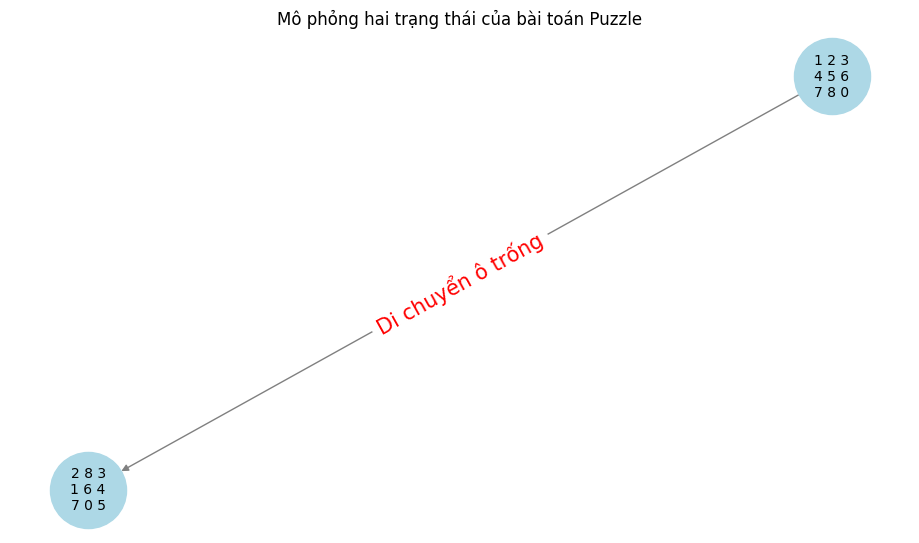

In [12]:
import networkx as nx
import matplotlib.pyplot as plt
def draw_puzzle_states():
    G=nx.DiGraph()
    state_1="1 2 3\n4 5 6\n7 8 0"
    state_2="2 8 3\n1 6 4\n7 0 5"
    G.add_edge(state_1,state_2, action="di chuyen")

    pos=nx.spring_layout(G)
    plt.figure(figsize=(9,5))
    nx.draw(G,pos,with_labels=True,node_color='lightblue', edge_color='gray', node_size=3000, font_size=10)
    edge_labels = {(state_1, state_2): "Di chuyển ô trống"}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=15, font_color='red')
    
    plt.title("Mô phỏng hai trạng thái của bài toán Puzzle")
    plt.show()

# Gọi hàm để vẽ
draw_puzzle_states()
    

Đường đi từ trạng thái ban đầu đến trạng thái đích:
Bước 0:
2 8 3
1 6 4
7 0 5

Bước 1:
2 8 3
1 0 4
7 6 5

Bước 2:
2 0 3
1 8 4
7 6 5

Bước 3:
0 2 3
1 8 4
7 6 5

Bước 4:
1 2 3
0 8 4
7 6 5

Bước 5:
1 2 3
8 0 4
7 6 5

Tổng số bước: 5


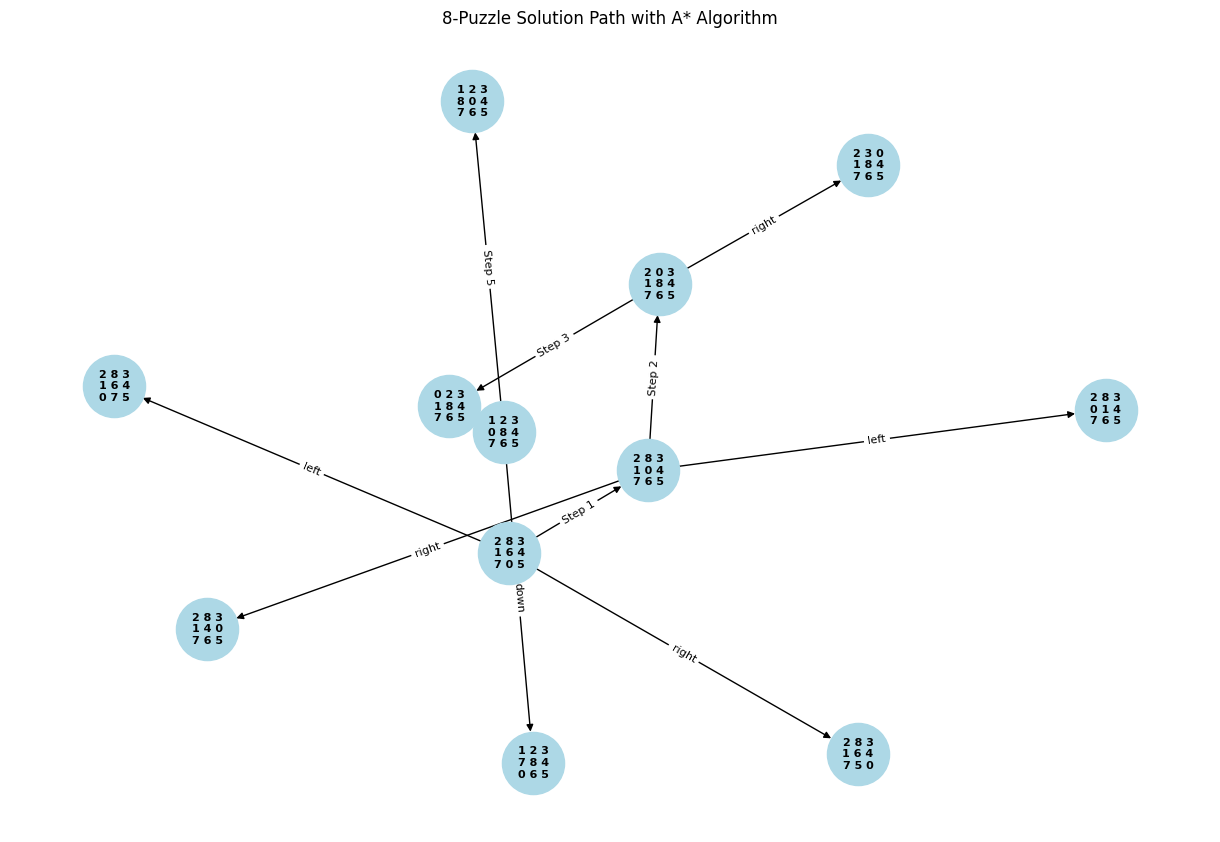

In [ ]:
import heapq
import networkx as nx
import matplotlib.pyplot as plt
from copy import deepcopy

# Hàm tính khoảng cách Manhattan
def manhattan_distance(state, goal):
    distance = 0
    for i in range(3):
        for j in range(3): # duyệt qua các phần tử trong statestate
            if state[i][j] != 0:
                value = state[i][j] # tìm thấythấy
                for r in range(3):
                    for c in range(3):# duyệt qua phần tử trong goalgoal
                        if goal[r][c] == value: # nếu thấy thì sẽ so sánh với statestate
                            distance += abs(i - r) + abs(j - c) # đếm xem lệch nhieue ô
                            break
    return distance

# Hàm tìm vị trí ô trống
def find_blank(state):
    for i in range(3):
        for j in range(3):
            if state[i][j] == 0:
                return i, j
    return None

# Hàm sinh các trạng thái con
def get_neighbors(state):
    neighbors = []
    blank_i, blank_j = find_blank(state)
    directions = [(-1, 0, "up"), (1, 0, "down"), (0, -1, "left"), (0, 1, "right")]

    for di, dj, move in directions:
        new_i, new_j = blank_i + di, blank_j + dj
        if 0 <= new_i < 3 and 0 <= new_j < 3:
            new_state = deepcopy(state)
            new_state[blank_i][blank_j], new_state[new_i][new_j] = new_state[new_i][new_j], new_state[blank_i][blank_j]
            neighbors.append((new_state, move))
    return neighbors

# Hàm in trạng thái
def print_state(state):
    for row in state:
        print(" ".join(map(str, row)))
    print()

# Hàm chuyển trạng thái thành chuỗi để làm nhãn
def state_to_string(state):
    return "\n".join(" ".join(map(str, row)) for row in state)

# Thuật toán A* với NetworkX
def a_star_with_graph(start, goal):
    G = nx.DiGraph()  # Đồ thị có hướng
    start = [list(row) for row in start]
    goal = [list(row) for row in goal]
    
    open_list = []
    heapq.heappush(open_list, (0 + manhattan_distance(start, goal), 0, start, []))
    closed_set = set()
    
    while open_list:
        f, g, current, path = heapq.heappop(open_list)
        current_tuple = tuple(map(tuple, current))
        
        if current == goal:
            path = path + [current]
            for i in range(len(path) - 1):
                G.add_edge(state_to_string(path[i]), state_to_string(path[i + 1]), label=f"Step {i + 1}")
            return path, G
        
        if current_tuple in closed_set:
            continue
        
        closed_set.add(current_tuple)
        G.add_node(state_to_string(current))
        
        for neighbor, move in get_neighbors(current):
            neighbor_tuple = tuple(map(tuple, neighbor))
            if neighbor_tuple not in closed_set:
                g_new = g + 1
                h_new = manhattan_distance(neighbor, goal)
                f_new = g_new + h_new
                neighbor_str = state_to_string(neighbor)
                current_str = state_to_string(current)
                G.add_edge(current_str, neighbor_str, label=move)
                heapq.heappush(open_list, (f_new, g_new, neighbor, path + [current]))
    
    return None, G

# Trạng thái ban đầu và đích
start_state = [
    [2, 8, 3],
    [1, 6, 4],
    [7, 0, 5]
]

goal_state = [
    [1, 2, 3],
    [8, 0, 4],
    [7, 6, 5]
]

# Chạy thuật toán A* và lấy đồ thị
solution, G = a_star_with_graph(start_state, goal_state)

# In đường đi
if solution:
    print("Đường đi từ trạng thái ban đầu đến trạng thái đích:")
    for i, state in enumerate(solution):
        print(f"Bước {i}:")
        print_state(state)
    print(f"Tổng số bước: {len(solution) - 1}")
else:
    print("Không tìm thấy đường đi!")

# Vẽ đồ thị
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G)  # Sắp xếp nút
nx.draw(G, pos, with_labels=True, node_size=2000, node_color="lightblue", font_size=8, font_weight="bold", arrows=True)
edge_labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)
plt.title("8-Puzzle Solution Path with A* Algorithm")
plt.show()